In [1]:
# MSDS 422 - Section 55
# Spring '24
# Module 05 - Midpoint check in for final project

# Initial EDA
# Kevin Geidel

import numpy as np
import pandas as pd
import os
import settings         # runs commands that sets base paths, configures behavors, etc
import utils            # defines functions used throughout

#### EDA: Data source

In [30]:
# Load the dataset

from scipy.io.arff import loadarff

arff_name = 'wine.arff'

raw_data = loadarff(
    os.path.join(settings.DATA_PATH, arff_name)
)
data = pd.DataFrame(raw_data[0])

data

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,binaryClass
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,b'N'
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,b'N'
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,b'N'
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,b'N'
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,b'N'
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,b'N'
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,b'N'
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,b'N'


In [3]:
# Examine the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic_acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  binar

In [4]:
# The target (binaryClass) happens to be the only caterorical (in this case Boolean) variable
# but still, we look at each one

data.select_dtypes(include=[object]).value_counts()

binaryClass
b'N'           107
b'P'            71
Name: count, dtype: int64

In [5]:
# We are going to encode the boolean values later anyways
# let's address this now so we can use the target in the rest of the EDA

data['isWine'] = data['binaryClass'].replace({b'N': 0, b'P': 1})

data.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,binaryClass,isWine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,b'N',0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,b'N',0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,b'N',0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,b'N',0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,b'N',0


#### EDA: Basic data structure

In [6]:
# Descriptive stats of numerical columns

data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,isWine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.398876
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.491049
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,1.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,1.000000


In [7]:
# Get null counts

pd.DataFrame(
    [(col, data[col].isnull().sum()) for col in data.columns], 
    columns = ['Columns Name', 'Null Count']
)

,Columns Name,Null Count
0,Alcohol,0
1,Malic_acid,0
2,Ash,0
3,Alcalinity_of_ash,0
4,Magnesium,0
5,Total_phenols,0
6,Flavanoids,0
7,Nonflavanoid_phenols,0
8,Proanthocyanins,0
9,Color_intensity,0


#### EDA: Initial visualizations

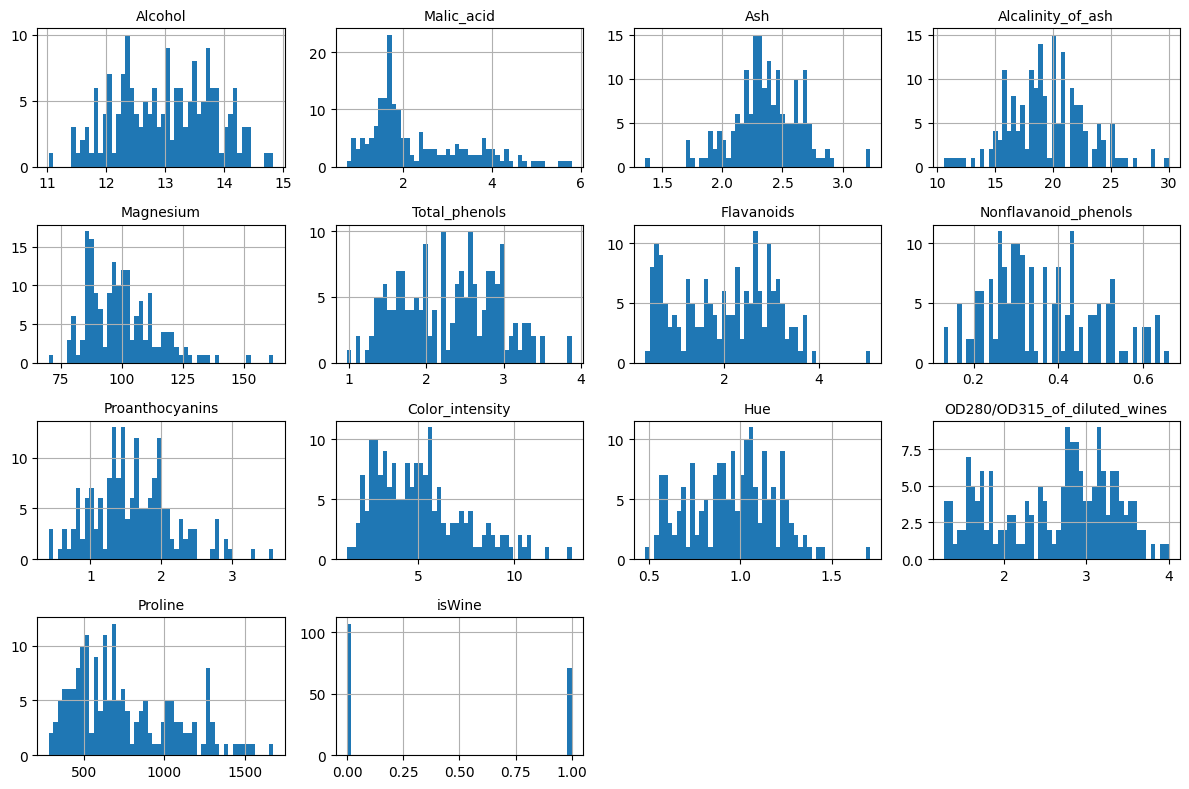

In [8]:
# Make historgrams of the numeric variables for initial visualization

import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12, 8))

utils.save_fig("attribute_histogram_plots")
plt.show()

In [9]:
# Check for linear correlations

correlations = data.corr(numeric_only=True)
correlations["isWine"].sort_values(ascending=False)

isWine                          1.000000
Hue                             0.353213
OD280/OD315_of_diluted_wines    0.199813
Alcalinity_of_ash               0.181764
Proanthocyanins                 0.056208
Flavanoids                      0.042179
Nonflavanoid_phenols            0.011868
Total_phenols                  -0.047301
Malic_acid                     -0.295175
Magnesium                      -0.296972
Ash                            -0.362457
Proline                        -0.589850
Color_intensity                -0.694679
Alcohol                        -0.726383
Name: isWine, dtype: float64

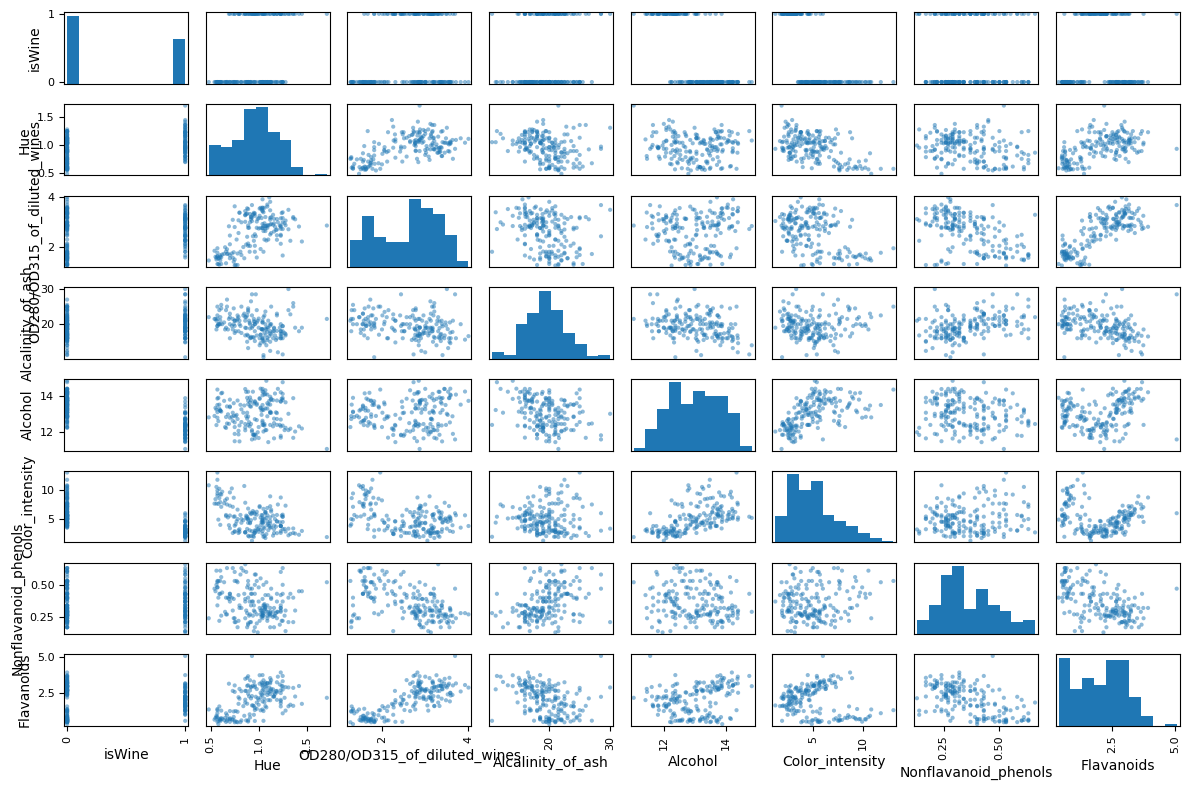

In [10]:
# plot scatter plots for interesting columns with promising coefficieients

from pandas.plotting import scatter_matrix

scatter_plot_cols = [
    'isWine', 'Hue', 'OD280/OD315_of_diluted_wines', 'Alcalinity_of_ash',
    'Alcohol', 'Color_intensity', 'Nonflavanoid_phenols', 'Flavanoids'
]

scatter_matrix(data[scatter_plot_cols], figsize=(12, 8))
utils.save_fig("scatter_matrix_plot") 
plt.show()

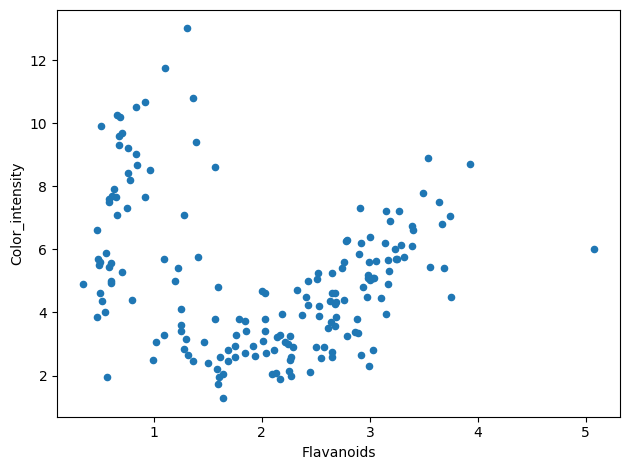

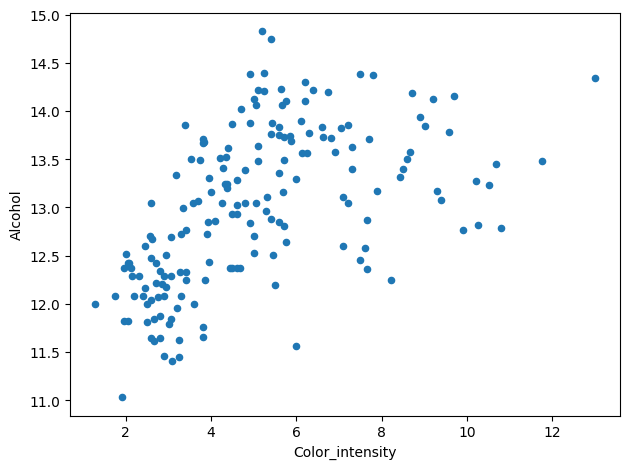

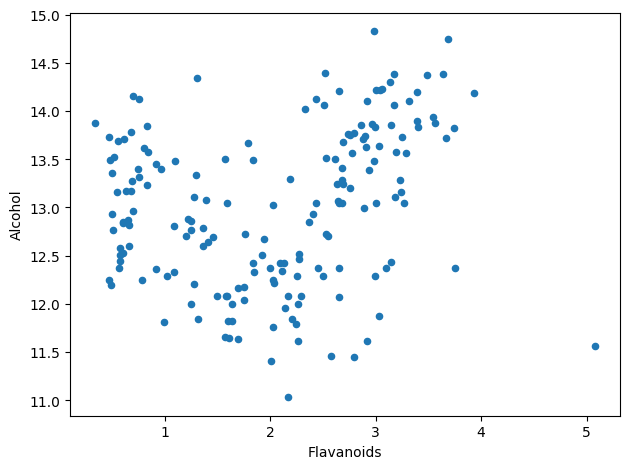

In [11]:
# lets examine some graphs up close
# we are looking for interesting relationships that may not be linear
# and/or may make for good engineered features.

single_scatter_ls = [
    ('Color_intensity', 'Flavanoids'), # seems to have two distinct groupings
    ('Alcohol', 'Color_intensity'),    # has very curious shape
    ('Alcohol', 'Flavanoids'),         # also has a hook shape w/ ostensibly distinct clusters
]

for y, x in single_scatter_ls:
    data.plot(kind='scatter', x=x, y=y)
    utils.save_fig(f"scatterplot_{y}_over_{x}")
    plt.show()

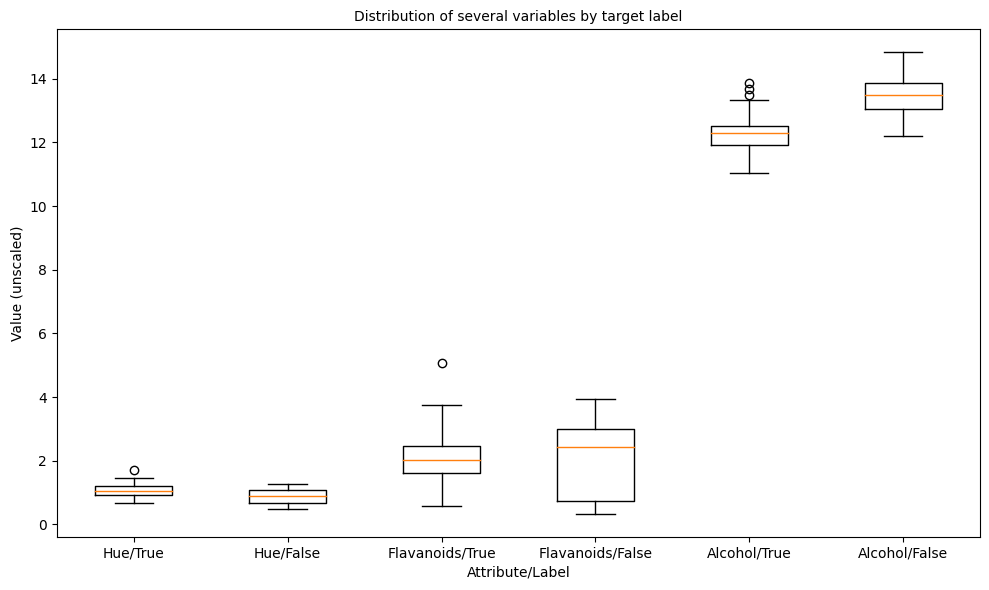

In [12]:
# The scatter plots over the dependent variable were odd (it is a binary target)
# Lets use box plots to prob those relationships instead

fig, ax1 = plt.subplots(figsize=(10, 6))
bp = ax1.boxplot(
    [
        data.Hue[data["isWine"]==True], 
        data.Hue[data["isWine"]==False],

        data.Flavanoids[data["isWine"]==True], 
        data.Flavanoids[data["isWine"]==False],

        data.Alcohol[data["isWine"]==True], 
        data.Alcohol[data["isWine"]==False],

    ],
    notch=False, vert=True, whis=1.5
)
ax1_conf = ax1.set(
    axisbelow=True,
    title='Distribution of several variables by target label',
    xlabel='Attribute/Label',
    ylabel='Value (unscaled)',
    xticklabels=[
        'Hue/True',
        'Hue/False',
        'Flavanoids/True',
        'Flavanoids/False',
        'Alcohol/True',
        'Alcohol/False',
    ]
)
utils.save_fig('box_plots')

#### EDA: Engineering features

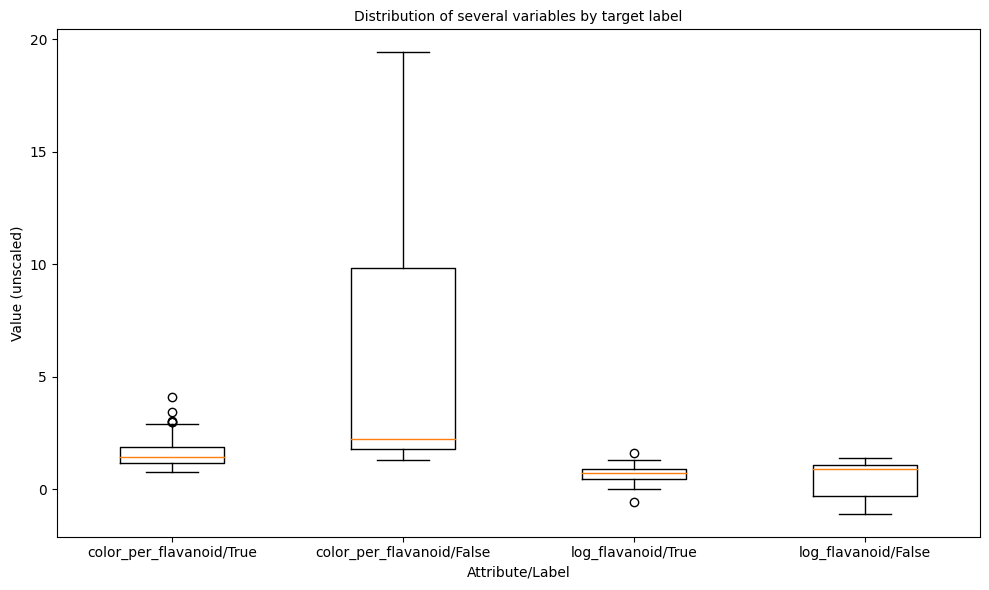

isWine                 1.000000
log_flavanoid          0.172148
color_per_flavanoid   -0.467811
Name: isWine, dtype: float64


In [13]:
# The scatter plot for Color_intensity over Flavanoids seemed to have two trends present.
# I wonder what the distributions over their ratio looks like for each
# value of the target (isWine)

data['color_per_flavanoid'] = data['Color_intensity'] / data['Flavanoids']

# Checking out the original histograms diplayed above we can see the distributions
# of Flavanoids have the same range for isWine == True and isWine == False
# but the variablity is quite differenent. Let's see if log(Flavanoid) gives
# us anything interesting.

data['log_flavanoid'] = np.log(data['Flavanoids'])


fig, ax1 = plt.subplots(figsize=(10, 6))
bp = ax1.boxplot(
    [
        data.color_per_flavanoid[data["isWine"]==True], 
        data.color_per_flavanoid[data["isWine"]==False],

        data.log_flavanoid[data["isWine"]==True], 
        data.log_flavanoid[data["isWine"]==False],
    ],
    notch=False, vert=True, whis=1.5
)
ax1_conf = ax1.set(
    axisbelow=True,
    title='Distribution of several variables by target label',
    xlabel='Attribute/Label',
    ylabel='Value (unscaled)',
    xticklabels=[
        'color_per_flavanoid/True',
        'color_per_flavanoid/False',
        'log_flavanoid/True',
        'log_flavanoid/False',
    ]
)
utils.save_fig('box_plots_new_features')
plt.show()
print(
    data[['color_per_flavanoid', 'log_flavanoid', 'isWine']].corr()['isWine'].sort_values(ascending=False)
)

#### ML Pipeline: Data preparation

In [14]:
# Create a Test Set 

from sklearn.model_selection import train_test_split

test_ratio = 0.15       # Let's set aside 15% of the records for testing

random_seed = 1         # To prevent data leakage I will set a seed while developing
                        # so random_seed = 1 will give me the same train/test split over and over
# random_seed = None      # but use a fresh seed (seed=None) when its time to submit
            
# Set some test_data aside (and not look at it until very end!)
training_data, test_data = train_test_split(data, test_size=test_ratio, random_state=random_seed)

# Take labels off training_data
x_training = training_data.drop(['isWine', 'binaryClass'], axis=1)
training_labels = training_data['isWine'].copy()


x_training

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,color_per_flavanoid,log_flavanoid
29,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,2.017167,0.845868
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,1.974522,1.144223
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,11.769231,-0.430783
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1.160000,0.916291
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,10.681818,0.095310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,4.166667,0.182322
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,8.333333,-0.510826
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,2.032609,0.609766
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,9.200000,-0.693147


In [15]:
# Cleaning begins with null/missing values

null_rows_idx = x_training.isnull().any(axis=1)

# We confirm what we discovered above, no missing values in this dataset
# (For when we move to abstraction later, I will still include an imputer)
print(
    null_rows_idx[null_rows_idx==True].shape
)

(0,)


In [16]:
# lets build the preprocessing pipeline for numerical features

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [17]:
# this example use case is not using caterorical features
# but this is how we could construct the pipline for those:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categoric_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(handle_unknown="ignore")),
])

In [18]:
# A ColumnTransformer can make a single pipeline

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (numeric_pipeline, make_column_selector(dtype_include=np.number)),
    (categoric_pipeline, make_column_selector(dtype_include=object)),
)

preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f47ba6daf10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f47b89370d0>)])

In [19]:
# We can test our preprocessing pipeline on our training data.

training_data_cleaned = preprocessing.fit_transform(x_training)

training_data_cleaned_df = pd.DataFrame(
    training_data_cleaned,
    columns=preprocessing.get_feature_names_out(),
    index=training_data.index
)

training_data_cleaned_df.head()

,pipeline-1__Alcohol,pipeline-1__Malic_acid,pipeline-1__Ash,pipeline-1__Alcalinity_of_ash,pipeline-1__Magnesium,pipeline-1__Total_phenols,pipeline-1__Flavanoids,pipeline-1__Nonflavanoid_phenols,pipeline-1__Proanthocyanins,pipeline-1__Color_intensity,pipeline-1__Hue,pipeline-1__OD280/OD315_of_diluted_wines,pipeline-1__Proline,pipeline-1__color_per_flavanoid,pipeline-1__log_flavanoid
29,1.259587,-0.619230,-0.535083,-1.063608,-0.207330,0.589146,0.337732,-0.874546,0.710735,-0.165290,0.365559,1.405185,0.963100,-0.498390,0.515697
16,1.603015,-0.410962,1.316905,0.151484,1.535977,0.827519,1.147851,-0.286882,0.693358,0.455370,0.494389,0.085971,1.769644,-0.508292,0.992637
147,-0.150920,1.923377,0.445381,0.607144,-0.933709,-0.920554,-1.342516,0.888445,-1.235501,1.055342,-1.781607,-1.022730,-0.386627,1.766075,-1.525116
97,-0.862306,-0.853531,-1.370293,-1.063608,-1.006346,0.430230,0.507757,-0.622690,0.345816,-0.910082,1.181482,0.212279,-1.035154,-0.697428,0.628272
159,0.597262,-0.627908,1.026397,0.910916,-0.715795,0.509688,-0.892449,1.308205,1.249426,2.751813,-1.652777,-1.135004,-0.403087,1.513574,-0.684120


#### Deployment: Model selection & evaluation

In [20]:
# Model number 1 is an SGDClassifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=422)
sgd_clf.fit(training_data_cleaned_df, training_labels)


SGDClassifier(random_state=422)

In [21]:
# Model number 2 will be a RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=422)
forest_clf.fit(training_data_cleaned_df, training_labels)

RandomForestClassifier(random_state=422)

In [22]:
# Model number 3 will be a SVM

from sklearn.svm import SVC

svm_clf = SVC(random_state=422)
svm_clf.fit(training_data_cleaned_df, training_labels)

SVC(random_state=422)

In [23]:
# Model number 4 will be a K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(training_data_cleaned_df, training_labels)

KNeighborsClassifier()

In [24]:
# Let's evaluate our four models on the test data.

test_y = test_data['isWine']
test_x = preprocessing.fit_transform(test_data.drop(['isWine', 'binaryClass'], axis=1))
test_x = pd.DataFrame(
    test_x,
    columns=preprocessing.get_feature_names_out(),
    index=test_data.index
)
test_x.head()

,pipeline-1__Alcohol,pipeline-1__Malic_acid,pipeline-1__Ash,pipeline-1__Alcalinity_of_ash,pipeline-1__Magnesium,pipeline-1__Total_phenols,pipeline-1__Flavanoids,pipeline-1__Nonflavanoid_phenols,pipeline-1__Proanthocyanins,pipeline-1__Color_intensity,pipeline-1__Hue,pipeline-1__OD280/OD315_of_diluted_wines,pipeline-1__Proline,pipeline-1__color_per_flavanoid,pipeline-1__log_flavanoid
161,0.834735,1.561867,0.475048,0.152916,0.145732,-0.944096,-1.767256,1.019077,-1.702355,0.665657,-0.060025,-1.378083,-0.251360,2.436004,-2.187141
117,-0.803677,-0.510235,-0.885316,0.859892,0.209196,-0.654237,-0.153878,-0.059946,-0.174009,-1.748403,0.446439,0.329542,-1.168856,-0.708457,0.111771
19,0.770231,1.360936,0.552783,-1.204477,0.716907,0.539303,0.837347,-1.206407,-0.079667,0.172734,-0.060025,0.928708,0.200541,-0.477928,0.760081
69,-1.074596,-1.037679,-2.595489,-0.752013,2.938144,-0.909995,-1.008019,-1.408724,1.505284,-1.249160,1.560660,0.494313,-0.147286,-0.298338,-0.744099
53,0.937942,-0.146047,1.019194,-0.667176,0.653443,1.050820,0.584268,0.277249,-0.041930,0.931077,0.800964,0.284604,1.652101,-0.287927,0.616033


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate model #1...

sgd_preds = sgd_clf.predict(test_x)

sgd_metrics = dict(
    model = 'Stochastic Gradient Descent',
    accuracy = round(np.mean(cross_val_score(
        sgd_clf, test_x, test_y, 
        cv=3, scoring='accuracy'
    )), 2),
    precision = precision_score(test_y, sgd_preds),
    recall = recall_score(test_y, sgd_preds),
    f1 = f1_score(test_y, sgd_preds),
)

sgd_metrics

{'model': 'Stochastic Gradient Descent',
 'accuracy': 0.89,
 'precision': 0.9,
 'recall': 0.9,
 'f1': 0.9}

In [26]:
# Evaluate model #2...

forest_preds = forest_clf.predict(test_x)

forest_metrics = dict(
    model = 'Random Forest Classifier',
    accuracy = round(np.mean(cross_val_score(
        forest_clf, test_x, test_y, 
        cv=3, scoring='accuracy'
    )), 2),
    precision = precision_score(test_y, forest_preds),
    recall = recall_score(test_y, forest_preds),
    f1 = f1_score(test_y, forest_preds),
)

forest_metrics

{'model': 'Random Forest Classifier',
 'accuracy': 0.96,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0}

In [27]:
# Evaluate model #3...

svm_preds = svm_clf.predict(test_x)

svm_metrics = dict(
    model = 'Support Vector Machine',
    accuracy = round(np.mean(cross_val_score(
        svm_clf, test_x, test_y, 
        cv=3, scoring='accuracy'
    )), 2),
    precision = precision_score(test_y, svm_preds),
    recall = recall_score(test_y, svm_preds),
    f1 = f1_score(test_y, svm_preds),
)

svm_metrics

{'model': 'Support Vector Machine',
 'accuracy': 0.89,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0}

In [28]:
# Evaluate model #4...

knn_preds = knn_clf.predict(test_x)

knn_metrics = dict(
    model = 'K-Neighbors Classifier',
    accuracy = round(np.mean(cross_val_score(
        knn_clf, test_x, test_y, 
        cv=3, scoring='accuracy'
    )), 2),
    precision = precision_score(test_y, knn_preds),
    recall = recall_score(test_y, knn_preds),
    f1 = round(f1_score(test_y, knn_preds), 2),
)

knn_metrics

{'model': 'K-Neighbors Classifier',
 'accuracy': 0.93,
 'precision': 1.0,
 'recall': 0.9,
 'f1': 0.95}

In [29]:
metrics_df =  pd.DataFrame(
    [sgd_metrics, forest_metrics, svm_metrics, knn_metrics]
)

metrics_df

,model,accuracy,precision,recall,f1
0,Stochastic Gradient Descent,0.89,0.9,0.9,0.90
1,Random Forest Classifier,0.96,1.0,1.0,1.00
2,Support Vector Machine,0.89,1.0,1.0,1.00
3,K-Neighbors Classifier,0.93,1.0,0.9,0.95
